# Daily Climate time series data analysis

## Config

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Check for GPU
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 2060 (UUID: GPU-40e49d7d-28f8-2e42-5423-abd4e1b056f4)


## Data loading

In [4]:
# Parse dates and set date column to index
train_df = pd.read_csv("./data/DailyDelhiClimateTrain.csv",
                       parse_dates=["date"],
                       index_col=["date"])
test_df = pd.read_csv("./data/DailyDelhiClimateTest.csv",
                      parse_dates=["date"],
                      index_col=["date"])

## Data vizualisation

In [5]:
train_df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [10]:
train_df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='date', length=1462, freq=None)

In [62]:
def plot_time_series(ax,
                     timesteps,
                     values,
                     title,
                     format='.',
                     start=0,
                     end=None,
                     label=None,
                     c='b'):
    """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  ax : matplotlib.Axes to plot
  timesteps : array of timesteps
  values : array of values across time
  title : title of plot
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  c : color, default 'blue'
  """
    ax.plot(timesteps[start:end], values[start:end], format, c=c, label=label)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Time")
    ax.tick_params('x', labelrotation=45)
    ax.grid(True)

    if label:
        ax.legend(fontsize=14, bbox_to_anchor=(1, 1), loc='upper left')


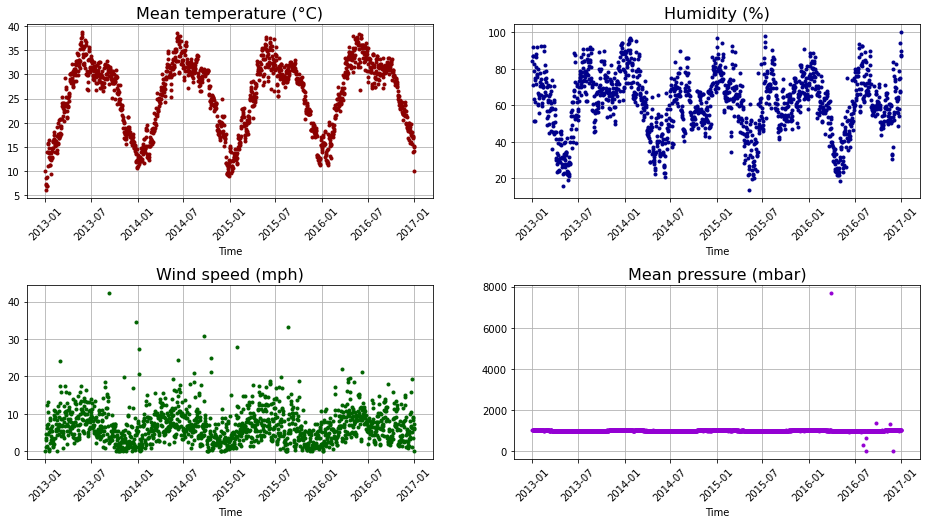

In [57]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,
                                             2,
                                             figsize=(16, 8),
                                             gridspec_kw={'hspace': .5})

plot_time_series(ax1, train_df.index, train_df["meantemp"], "Mean temperature (°C)", c='darkred')
plot_time_series(ax2, train_df.index, train_df["humidity"], "Humidity (%)", c='darkblue')
plot_time_series(ax3, train_df.index, train_df["wind_speed"], "Wind speed (mph)", c='darkgreen')
plot_time_series(ax4, train_df.index, train_df["meanpressure"], "Mean pressure (mbar)", c='darkviolet')

fig.savefig('./graphs/train_data.png', facecolor='white')

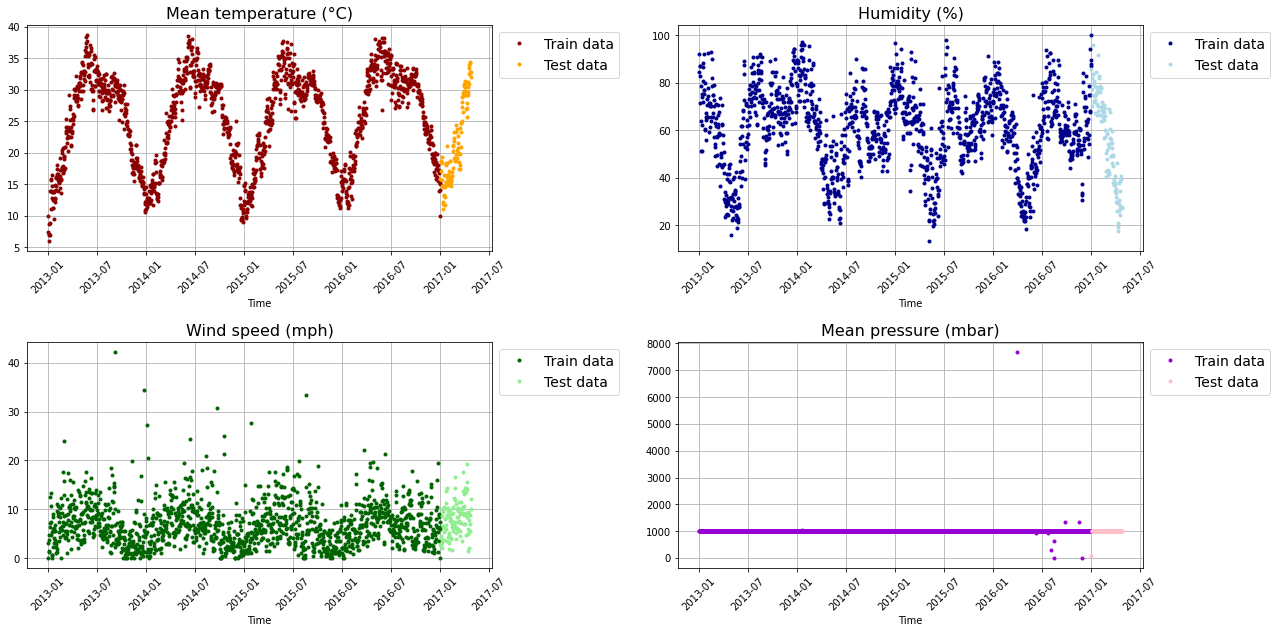

In [67]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,
                                             2,
                                             figsize=(20, 10),
                                             gridspec_kw={
                                                 'wspace': .4,
                                                 'hspace': .4
                                             })

plot_time_series(ax1,
                 train_df.index,
                 train_df["meantemp"],
                 "Mean temperature (°C)",
                 label='Train data',
                 c='darkred')
plot_time_series(ax1,
                 test_df.index,
                 test_df["meantemp"],
                 "Mean temperature (°C)",
                 label='Test data',
                 c='orange')
plot_time_series(ax2,
                 train_df.index,
                 train_df["humidity"],
                 "Humidity (%)",
                 label='Train data',
                 c='darkblue')
plot_time_series(ax2,
                 test_df.index,
                 test_df["humidity"],
                 "Humidity (%)",
                 label='Test data',
                 c='lightblue')
plot_time_series(ax3,
                 train_df.index,
                 train_df["wind_speed"],
                 "Wind speed (mph)",
                 label='Train data',
                 c='darkgreen')
plot_time_series(ax3,
                 test_df.index,
                 test_df["wind_speed"],
                 "Wind speed (mph)",
                 label='Test data',
                 c='lightgreen')
plot_time_series(ax4,
                 train_df.index,
                 train_df["meanpressure"],
                 "Mean pressure (mbar)",
                 label='Train data',
                 c='darkviolet')
plot_time_series(ax4,
                 test_df.index,
                 test_df["meanpressure"],
                 "Mean pressure (mbar)",
                 label='Test data',
                 c='pink')

fig.savefig('./graphs/train_plus_test_data.png', facecolor='white')

## Model 0 : Naïve forecast (baseline)